In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("project1.ipynb")

### Logistics

**Corresponding Author.** Yanay Rosen (yanayrosen (at) berkeley)

**Deadline.** Saturday 7/10 at 11:59pm P.T.

**Checkpoint.** For full credit on the checkpoint, you must complete the first 2 sections, pass all public autograder tests for those sections, and submit to the Gradescope Checkpoint assignment by 11:59pm P.T. on Thursday, 7/08. **This is worth 5% of your entire project grade**. After you've submitted the checkpoint, you may still change your answers before the project deadline - only your final submission, to the Project 1 assignment, will be graded for correctness. We recommend that you start the project as soon as possible.

**Partners.** You may work with one other partner; your partner must be from your assigned lab section. **Only one of you is allowed to submit the project. If both partners submit, you will be docked 10% of your project grade, and we will use whichever submission yields you fewer points.** 

On Gradescope, the person who submits should also designate their partner so that both of you receive credit. Feel free to split up the work between your partner, share what you complete with each other in a google document, and share your screen in a Zoom call as you work together.

**[Watch this tutorial video](https://drive.google.com/file/d/19hdMiqeO6svyPxOtAfHMDOj99HorcO5_/view?usp=sharing) on how to add a project partner on Gradescope.**

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours, post on Piazza, and talk to your classmates. If you want to ask about the details of your solution to a problem, make a private Piazza post and the staff will respond. If you're ever feeling overwhelmed or don't know how to make progress, email your TA or tutor for help. You can find contact information for the staff on the [course website](http://data8.org/su21/staff.html).

**Tests.** The tests that are given are **not comprehensive** and passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work! You might want to create your own checks along the way to see if your answers make sense. Additionally, before you submit, make sure that none of your cells take a very long time to run (several minutes).

**Free Response Questions:** Make sure that you put the answers to the written questions in the indicated cell we provide. **Every free response question should include an explanation** that adequately answers the question.

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. Make sure that you are using distinct and meaningful variable names throughout the notebook. Along that line, **DO NOT** reuse the variable names that we use when we grade your answers. For example, in Question 1 of the New Technology section we ask you to assign an answer to `sc`. Do not reassign the variable name `sc` to anything else in your notebook, otherwise there is the chance that our tests grade against what `sc` was reassigned to.

**You should have scratch paper or some other place to work out problems before trying them in the notebook. This will greatly improve your ability to solve some of the more difficult questions.**

**Before you start the project, you should read through the [Tabular Thinking Guide](https://drive.google.com/file/d/1ncT6mP_-5UYx1F21_iDsVQVyWJjbE4l8/view?usp=sharing)**

You **never** have to use just one line in this project or any others. Use intermediate variables and multiple lines as much as you would like!

In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Project 1: The Power of Data

### In this project you will use table manipulations and visualizations to help biologists determine which specific cells in our lungs are associated with the disease cystic fibrosis.

In the past few decades, new computational, mathematical and scientific innovations have contributed to an exponential increase in the volume, variety and velocity of data generation.

Among the countless scientific fields embracing 'big data', biological sciences presents an impressive avenue for leveraging data science.

In the following project you will use data science to understand a large quantity of data, across many variables, and single out a future avenue for biological research on cystic fibrosis.

***Note: If you have any concerns related to the subject of the project, please email the instructors!***

### Domain Emphasis

Understanding the domain you are working in is critical to success as a Data Scientist.

Since one of the goals of Data 8 is to teach you technical fundamentals of data science, agnostic of any specific field, none of our assignments require any specific domain knowledge. 

That being said, we think assignments are more **engaging** if you understand some of the domain specific reasoning behind them. 

### Basic Biology Overview

1. All living things are made up of cells.
2. All cells in an organism share the same genetic code called "DNA", the molecular instructions for all functions of living things. The molecules that encode our DNA are called "Base Pairs".
3. Cells are different because they implement different parts of the DNA at different times. DNA is actually implemented—"expressed"— in the cell when parts of it are converted to "RNA". Sections of RNA are then converted to proteins.
4. Sections of DNA are called "Genes". Genes are portions of DNA that we have identified as coding for specific proteins: molecules that have some function in the body. For example, the protein hemoglobin carries oxygen in your blood.

**So as a summary:**

$$\text{DNA} \rightarrow \text{RNA} \rightarrow \text{Protein} \rightarrow \text{Function}$$

# 1. New Technology

### In this section of the project we will learn about a new technology that has increased the power of biological analysis. We will first assess how popular this technology is.

The amount of data governing living organisms is staggering.

While the [Human Genome Project](https://en.wikipedia.org/wiki/Human_Genome_Project) successfully sequenced the 3+ billion base pairs that compose human DNA in 2003, knowing our genetic code does not tell us how it is actually implemented and interpreted in our bodies. 

Every cell in your body has the same DNA<sup>1</sup>, but a neuron cell in your brain looks and behaves very differently from a stomach cell, a skin cell, a white blood cell or a cell in your lungs.

*$ ^{1}$Individual cells may have a tiny amount of variation due to mutation.*

[**Brain Cells**](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Human_astrocyte.png/1200px-Human_astrocyte.png)
![Brain Cells](brain_cells.png)

[**Stomach Cells**](https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Chief_cells.JPG/1200px-Chief_cells.JPG)
![Stomach Cells](stomach_cells.jpg)

In 2009, biologists began developing new techniques to analyze how our genome is actually expressed in individual cells. These new techniques enable scientists to better understand complex biological phenomena at unprecedented resolutions. 

One of these technologies is called "Single Cell RNA Sequencing" (scRNA-seq).

**By investigating RNA expression in individual cells, we can better understand how cells are actually functioning and where certain diseases may arise.**

If you are interested in a little bit more info about this technology, you can watch the following video, but it's not necessary for the completion of the project:

In [3]:
from IPython.display import HTML
HTML('''
<iframe width="600" height="480" src="https://www.youtube.com/embed/DWcFTjrEBDg" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen>
</iframe>
''')

Let's take a look at the popularity of this technology over the past few years.

**A really useful research tool for determining popularity is [Google Trends](https://trends.google.com/trends/).**

Google Trends lets you compare the popularity of search terms on Google.


In [4]:
# Load in the following data
sc = Table.read_table("single_cell_sequencing_pop.csv").relabeled(1, "Interest over time")
sc.show(10)

Month,Interest over time
2004-01,0
2004-02,0
2004-03,0
2004-04,0
2004-05,30
2004-06,0
2004-07,0
2004-08,0
2004-09,0
2004-10,0


The `sc` table contains the `Interest over time` for the search topic "Single Cell Sequencing", worldwide, broken down by `month`. Google trends defines Interest over time as:

> Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

**Dataset Details:**
- Origin: The dataset can be found [here](https://trends.google.com/trends/explore?date=all&q=%2Fm%2F0_t__77) **[We've already downloaded it for you]**
- Extra Context: Google is not the predominant search engine in every country. Google may not be the primary tool used for scientific research. We're not sure of the accuracy of these reports.

**Question 1.** The first month in the data set is January 2004. In order to visualize this data, we need to convert the month column to floats. Add a column called `Time` to the `sc` table with a decimal representation of the month. 

For example, the first month in the dataset, January 2004, should be represented as `2004.0`, the fifth month in the dataset should be `2004.3333` and the thirteenth month in the dataset should be `2005`. **(6 Points)**

<!--
BEGIN QUESTION
name: q1_1
manual: false
points:
 - 0
 - 0
 - 0
 - 0
 - 6
-->

In [5]:
# HINT: Try to use array arithmetic
# HINT: How long should the array you add to the table be?
# The sc table has one row for every month in the time frame... 
# how can you access the number of months?
month_floats = np.arange(2004,2004+len(sc.column("Month"))/12,1/12)
sc = sc.with_column(
    "Time",month_floats
)
sc

Month,Interest over time,Time
2004-01,0,2004
2004-02,0,2004.08
2004-03,0,2004.17
2004-04,0,2004.25
2004-05,30,2004.33
2004-06,0,2004.42
2004-07,0,2004.5
2004-08,0,2004.58
2004-09,0,2004.67
2004-10,0,2004.75


In [6]:
grader.check("q1_1")

q1_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2:** Visualize the popularity of the search term 'Single Cell Sequencing' over the entire time range. **(3 Points)**

<!--
BEGIN QUESTION
name: q1_2
manual: true
-->

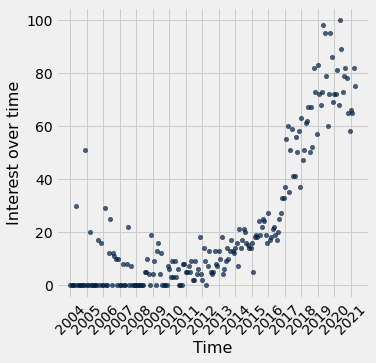

In [7]:
sc.scatter("Time","Interest over time")

# DON'T CHANGE THIS LINE OF CODE
plots.xticks(np.arange(2004, 2022), rotation = 45); 

<!-- END QUESTION -->

**Question 3.** What was the most popular month for this search term in 2018? Assign the corresponding string value from the `Month` column to `most_popular`. **(3 Points)**

<!--
BEGIN QUESTION
name: q1_3
manual: false
points:
 - 0
 - 0
 - 3
-->

In [8]:
twenty_eighteen = sc.where("Month",are.containing("2018"))

most_popular = twenty_eighteen.where("Interest over time",are.equal_to(max(twenty_eighteen.column("Interest over time")))).column("Month").item(0)
most_popular

'2018-10'

In [9]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 4.** Oftentimes when working with data that is associated with times and dates, it is useful to take a "Rolling Average", which reports the value as the average value of the `k` previous points.  **(8 Points)**

If there aren't k values before the value you want the rolling average of, the rolling average value should be 0.

Define the function `rolling_average`, which takes in the integer arguments `i` and `k`, and returns the `k` rolling average of the `Interest over time` values for the `i`th row in the popularity table.

*Hint: If we want to take the rolling average of the previous k = 3 points for row with index i = 10, which rows do we want to be taking the Interest over time average for? (Rows with index 7, 8 and 9. Note that we do not include the value from the row with index 10).*

**Hint: If you're having trouble with this question, fill in the following picture:**

<img src="rolling_average.png">

<!--
BEGIN QUESTION
name: q1_4
manual: false
points:
 - 0
 - 0
 - 8
-->

In [10]:
def rolling_average(i, k):
    '''The k-rolling average for the ith row in the sc table.'''
    if (i-k<0):
        return 0
    k_previous_row_indices = i-k
    tbl_k_rows = sc.take(np.arange(k_previous_row_indices,i))
    return np.average(tbl_k_rows.column("Interest over time"))

# The k=12 rolling average for month 13
second_rolling_average = rolling_average(13, 12)
second_rolling_average

6.75

In [11]:
grader.check("q1_4")

q1_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 5.** Visualize the rolling average with `k=12` popularity of the search term 'Single Cell Sequencing' over the entire time range. **(5 Points)**

*Hint: The table `row_numbers` should be helpful!*

<!--
BEGIN QUESTION
name: q1_5
manual: true
-->

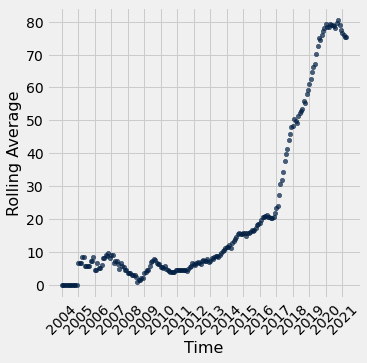

In [12]:
row_numbers = Table().with_columns("i", np.arange(sc.num_rows), "k", 12)

rolling_averages = sc.with_column(
    "Rolling Average",row_numbers.apply(rolling_average,"i","k")
)
rolling_averages.scatter("Time","Rolling Average")
# DON'T CHANGE THIS LINE OF CODE
plots.xticks(np.arange(2004, 2022), rotation = 45); 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 6.** What does this graph demonstrate about the popularity of Single Cell Sequencing? Does the dip in popularity of the search term around the end of 2020 indicate that fewer people are using the technology? **(3 Points)**

<!--
BEGIN QUESTION
name: q1_6
manual: true
-->

(1) This graph demonstrates that the popularity of the searching term ’Single Cell Sequencing’ presents an
ascendant trend overally. Now we can break down this graph in details by diferent years to see the graph
demonstrating about the popularity of search tearm ’Single Cell Sequencing’. The graph demonstates
that the popularity searching term had witnessed a small decrease between 2007 and 2008, and an increase between
2008 and 2009. Overall, the popularity of the searching term was increasing bewteen 2009 and 2019, and decreasing between 2020 and 2021.
(2)No. Though there was a small dip around the end of 2020, we can’t draw the conclusion that fewer people are using the technology. The time around 2020 is a special time because the global health crisis -- COVID-19 pandemic. It was reasonable that the popularity of search term went down at the period, for relevant research could be stopped at the time. But in the long run, we still observe the overall upward trend. If we want to determine whether generally the popularity of the technology rise or fall, we should draw that conclusion based on the long-term rolling average in this specific graph, and it is obvious that the trend is ascendant. Another
reason is that searching term does not really imply how many people actually use the technology. If someone doing relevant research already have a good command of knowledge in that field, it is possible to conduct research without searching online. Therefore, the dip in popularity of the searching term around the end of 2020 doesn’t indicate that fewer people are using the technology.

<!-- END QUESTION -->



# 2. Single Cell RNA Sequencing Data

### Now that you have learned a bit about this new technology, you're going to use real Single Cell RNA Sequencing (scRNA-seq) data to investigate cystic fibrosis. First, however, we need to load in the data.

This section of the project and section 3 are based on the paper [A revised airway epithelial hierarchy includes CFTR-expressing ionocytes](https://pubmed.ncbi.nlm.nih.gov/30069044/) and corresponding [data](https://singlecell.broadinstitute.org/single_cell/study/SCP163/airway-epithelium#study-summary).

>"The airways of the lung are the primary sites of disease in asthma and cystic fibrosis." (Montoro et al)

Many diseases impact the function of the cells in our lungs, including cystic fibrosis.

>"Cystic fibrosis (CF) is a genetic disorder that affects mostly the lungs, but also the pancreas, liver, kidneys, and intestine. Long-term issues include difficulty breathing and coughing up mucus as a result of frequent lung infections." [Wikipedia](https://en.wikipedia.org/wiki/Cystic_fibrosis)

Using Single Cell Sequencing and data science, biologists in the paper were able to identify a small subset of lung cells that appear to be the primary instigators of cystic fibrosis. By identifying these cells, scientists will be able to target drugs to cure cystic fibrosis with more accuracy. 

**You will work to identify these same cells!**

### Data Format

Single Cell RNA Sequencing (scRNA-seq) data is generally stored in a special data-saving format called the "Market Exchange Format" (MEX).

scRNA-seq experiments collect a gene RNA expression value for every single cell, and every gene, in a sample of tissue. Since gene RNA expression values are 0 for many gene-cell pairs, the MEX format does not store these values.

Let's take a look at the data from the study. The biologists analyzed 7193 mouse cells.

Run the following cells to read in the `matrix`, `cells` and `genes` tables.

**Dataset Details:**
- Origin: This dataset was sourced from [here](https://singlecell.broadinstitute.org/single_cell/study/SCP163/airway-epithelium#study-summary). **Not required:** To access the data, you can login with a google account. To replicate the expression data, you can download the required files listed in data_gen.ipynb and data_gen_2.ipynb. **[You don't have to do this, we've already done it for you]**
- Extra Context: There is no other context for this data.

In [13]:
matrix = Table.read_table("matrix.csv")
cells = Table.read_table("cells.csv")
genes = Table.read_table("genes.csv")

The `matrix` table contains one row **for each pair of Gene and Cell that had an RNA expression above 0**. Instead of using the names of the genes and cells, the `matrix` table instead refers to them by their numbers, stored in the `Gene Number` and `Cell Number` columns.

In [14]:
matrix

Gene Number,Cell Number,Expression
9,2,1.07
8,5,0.8
8,8,0.81
8,10,3.81
9,10,2.42
8,11,1.35
9,12,1.38
8,13,0.72
9,14,0.74
9,18,1.68


The names of the cells and genes are stored in the `cells` and `genes` tables, along with their corresponding numbers.

In [15]:
cells

Cell Name,Cell Number
WT_M1_GCTTGAGAAGTCGT,1
WT_M1_GGAACACTTTCGTT,2
WT_M1_GGAATGCTTCGACA,3
WT_M1_GGACAACTCTGAGT,4
WT_M1_GGACAACTTCGCTC,5
WT_M1_GGACATTGTCTGGA,6
WT_M1_GGACCCGAAGAGTA,7
WT_M1_GGACCTCTGGTTCA,8
WT_M1_GGACTATGCGCCTT,9
WT_M1_GGAGCAGATGGAGG,10


In [16]:
genes

Gene Name,Gene Number
P2ry14,1
Atp6v0d2,2
Stap1,3
Cftr,4
Ascl3,5
Moxd1,6
Foxi1,7
Asgr1,8
Atp6v1c2,9


**Question 1.** Assign `num_obs` to the number of possible cell and gene pairs in the experiment. A cell and gene pair is known as an observation (be sure to count RNA expression values that are equal to 0). **(3 Points)**

<!--
BEGIN QUESTION
name: q2_1
manual: false
points:
 - 0
 - 0
 - 3
-->

In [17]:
num_obs = cells.num_rows * genes.num_rows
num_obs

64737

In [18]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.** Cell Numbers and Gene Numbers can be difficult to work with. Assign `matrix_with_names` to a copy of the `matrix` table but with the *names* of Cells and Genes instead of numbers. The new table should have the columns `Cell`, `Gene` and `Expression`. **(5 Points)**

<!--
BEGIN QUESTION
name: q2_2
manual: false
points:
 - 0
 - 0
 - 0
 - 0
 - 2
 - 3
-->

In [19]:
matrix_with_gene_names = genes.join("Gene Number",matrix)
matrix_with_cell_names = cells.join("Cell Number",matrix_with_gene_names)


matrix_with_names = matrix_with_cell_names.drop("Cell Number","Gene Number").relabel("Cell Name","Cell").relabel("Gene Name","Gene")
matrix_with_names.show(5)

Cell,Gene,Expression
WT_M1_GGAACACTTTCGTT,Atp6v1c2,1.07
WT_M1_GGACAACTTCGCTC,Asgr1,0.8
WT_M1_GGACCTCTGGTTCA,Asgr1,0.81
WT_M1_GGAGCAGATGGAGG,Asgr1,3.81
WT_M1_GGAGCAGATGGAGG,Atp6v1c2,2.42


In [20]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 3.** We use cell and gene numbers instead of names to save space. How many characters in total are used to store the names of cells and the names of genes in all of `matrix_with_names`? Assign that value to `num_chars`. **(4 Points)**

*Hint: How do you count the number of characters in a string?*

<!--
BEGIN QUESTION
name: q2_3
manual: false
points:
 - 0
 - 4
-->

In [21]:
num_gene_chars = sum(matrix_with_names.apply(len,"Gene"))
num_cell_chars = sum(matrix_with_names.apply(len,"Cell"))

num_chars = num_gene_chars + num_cell_chars
num_chars

121756

In [22]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 4.** In order to perform more data analysis, it would be helpful to have a table that lists all the pairs of genes and cells, including those where the expression value is 0. **(6 Points)**

Assign `dense_matrix` to a table that has a column for cell names called `Cell`, and a column for each gene name. Each row should contain the expression values for the corresponding cell if there is any expression, or 0 if there is no expression.

*Hint: The `first_or_zero` function should be helpful!*

<!--
BEGIN QUESTION
name: q2_4
manual: false
points:
 - 0
 - 0
 - 0
 - 6
-->

In [23]:
def first_or_zero(arr):
    '''Returns the first value in the array or 0 if the array is empty.'''
    if (len(arr) == 0):
        return 0
    else:
        return arr.item(0)
    
dense_matrix = matrix_with_names.pivot("Gene","Cell","Expression",first_or_zero)
dense_matrix

Cell,Ascl3,Asgr1,Atp6v0d2,Atp6v1c2,Cftr,Foxi1,Moxd1,P2ry14,Stap1
Foxj1GFP_M1_AAAGATCTTGCATG,0,0,0,1.63,0,0,0,0,0
Foxj1GFP_M1_AACCGATGAGATCC,0,0,0,1.17,0,0,0,0,0
Foxj1GFP_M1_AACGGTACAACTGC,0,0,0,1.52,0,0,0,0,0
Foxj1GFP_M1_AATAGGGATTCGTT,0,0,0,2.17,0,0,0,0,0
Foxj1GFP_M1_AATCAAACGGCATT,0,0,0,2.46,0,0,0,0,0
Foxj1GFP_M1_AATCCGGAGGTCAT,0,0,0,1.56,0,0,0,0,0
Foxj1GFP_M1_AATCCTACGGTGAG,0,0,0,2.72,0,0,0,0,0
Foxj1GFP_M1_AATCTCTGAACAGA,0,0,0,2.47,0,0,0,0,0
Foxj1GFP_M1_AATGGCTGAGTGTC,0,0,0,1.26,0,0,0,0,0
Foxj1GFP_M1_AATGTCCTAGCACT,0,0,0,1.5,0,0,0,0,0


In [24]:
grader.check("q2_4")

q2_4 results: All test cases passed!

### Marker Genes

The gene Cftr has been associated with cystic fibrosis. The table `dense_matrix` contains the expression of 8 genes of interest including Cftr. We call these genes "marker genes". 

The biologists wanted to study the effect of using genetic engineering to "turn off" the `Foxi1` gene in some of the mice in the study (we'll see why in part 3).

Some of the cells start with the 2-letter prefix "WT". "WT" stands for "Wild type", which indicates that the cells come from mice *that were not genetically engineered*. (Wild type can be thought of as the control group).

First, in only the wild type group (control), we want to understand the association between expression of the genes Cftr and Foxi1. 

*If we looked at the non-wild type group, all the values for `Foxi1` would be 0, since we turned it off in those mice.*

<!-- BEGIN QUESTION -->

**Question 5.** Visualize the association between expression of the genes `Cftr` and `Foxi1` in cells that start with `"WT"`. **(5 Points)**

*Hint: The `first_two_letters` function should be helpful!*

<!--
BEGIN QUESTION
name: q2_5
manual: true
-->

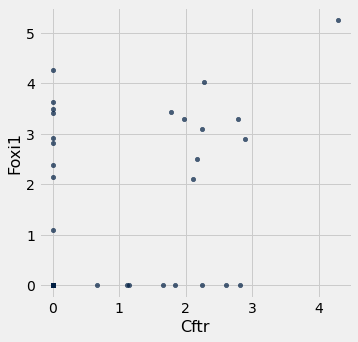

In [25]:
def first_two_letters(string):
    '''Returns the first two characters of a string'''
    return string[0:2]

with_prefixes = dense_matrix.with_column("First two letters",dense_matrix.apply(first_two_letters,"Cell")).where("First two letters",are.containing("WT"))
with_prefixes.scatter("Cftr","Foxi1")

<!-- END QUESTION -->



You should see a positive association in the expression between these two genes.

### Now that you have successfully loaded in the study data, and started some initial data exploration, you are ready to start investigating the study's findings with regards to cystic fibrosis!

# Checkpoint (due Thursday 7/08 by 11:59 PM PT)
#### Congratulations, you have reached the checkpoint! Run the following cells and submit to the gradescope assignment corresponding to the checkpoint:  <u>Project 1 Checkpoint</u> .

### NOTE: this checkpoint does not represent the halfway point of the project. You are **highly** encouraged to continue on to the next section early.

---

To double-check your work, the cell below will rerun all of the autograder tests for sections 1 and 2.

In [26]:
checkpoint_tests = ["q1_1", "q1_3", "q1_4", "q2_1", "q2_2", "q2_3", "q2_4"]
for test in checkpoint_tests:
    display(grader.check(test))

q1_1 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [27]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)

# 3. Cystic Fibrosis

### Now that you have processed the data from the experiment, we can determine which specific cells are associated with cystic fibrosis.

In addition to expression data, the biologists also collected other information about each cell, which will help us determine the type of cell associated with cystic fibrosis.

Run the following cells to load in the `tsne` table and the `metadata` table.

The `tsne` table contains the `Name` of each cell, and summary numerical values, `X` and `Y`.

The `metadata` table contains more metrics about each cell. 

**You will see the term 'metadata' a lot in data science- it means "a set of data that describes and gives information about other data."**

**Dataset Details:**
- Origin: This dataset was sourced from [here](https://singlecell.broadinstitute.org/single_cell/study/SCP163/airway-epithelium#study-summary). **Not required:** To access the data, you can login with a google account. To replicate the expression data, you can download the required files listed in data_gen.ipynb and data_gen_2.ipynb. **[You don't have to do this, we've already done it for you]**
- Extra Context: There is no other context for this data.

In [28]:
tsne = Table.read_table("tsne.tsv", sep="\t")
tsne

NAME,X,Y
WT_M1_GCTTGAGAAGTCGT,33.7013,2.65951
WT_M1_GGAACACTTTCGTT,-9.32879,-35.3672
WT_M1_GGAATGCTTCGACA,4.09252,-30.9445
WT_M1_GGACAACTCTGAGT,2.11504,13.1975
WT_M1_GGACAACTTCGCTC,-7.19801,-34.8209
WT_M1_GGACATTGTCTGGA,23.2688,-10.2378
WT_M1_GGACCCGAAGAGTA,-17.8078,-46.4286
WT_M1_GGACCTCTGGTTCA,-17.0704,-40.0664
WT_M1_GGACTATGCGCCTT,-4.56393,-20.1234
WT_M1_GGAGCAGATGGAGG,6.20114,-55.6744


In [29]:
metadata = Table.read_table("metadata.tsv", sep="\t")
metadata

NAME,cluster,mouse,nGene,Basal_score,Club_score,Ciliated_score
WT_M1_GCTTGAGAAGTCGT,Club,WT_M1,2063,0.375,1.17072,-0.42541
WT_M1_GGAACACTTTCGTT,Club,WT_M1,1571,-1.71258,2.6425,0
WT_M1_GGAATGCTTCGACA,Club,WT_M1,1881,-1.63678,2.73738,0.140587
WT_M1_GGACAACTCTGAGT,Basal,WT_M1,2061,0.645919,0.913838,-0.278481
WT_M1_GGACAACTTCGCTC,Club,WT_M1,2114,-1.70651,2.51677,0.0474835
WT_M1_GGACATTGTCTGGA,Club,WT_M1,1585,-1.39376,1.66843,-0.357173
WT_M1_GGACCCGAAGAGTA,Club,WT_M1,1694,-1.28335,2.72615,-0.0568574
WT_M1_GGACCTCTGGTTCA,Club,WT_M1,2182,-1.51001,2.86138,0.0972027
WT_M1_GGACTATGCGCCTT,Club,WT_M1,2116,-1.5365,1.73065,0.018228
WT_M1_GGAGCAGATGGAGG,Club,WT_M1,1202,-1.99302,3.13552,-0.0332952


### Let's explore the other data the biologists collected.

<!-- BEGIN QUESTION -->

**Question 1.** Visualize the number of cells of each type in each mouse. **(5 Points)**

The information about which mouse a cell came from is stored in the `mouse` column of the `metadata` table.

A cell type is one of `"Basal"`, `"Ciliated"`, `"Club"`, `"Goblet"`, `"Ionocyte"`, `"Neuroendocrine"` or `"Tuft"`. This information is stored in the `cluster` column of the `metadata` table. 

There were 6 different mice in the sample. Information about which mouse each cell comes from is stored in the `mouse` column of the `metadata` table.

<!--
BEGIN QUESTION
name: q3_1
manual: true
-->

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


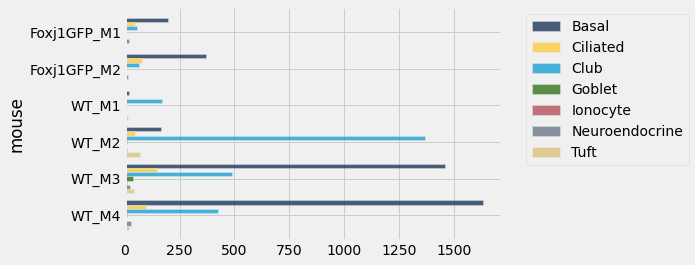

In [30]:
# What kind of visualization do you want to make? 
# Can you make that visualization overlaid?
# The Staff solution used one line of code!
cell_type_mouse = metadata.select('mouse','cluster').pivot('cluster','mouse').barh('mouse')
cell_type_mouse

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.** Visualize the association between the average `Basal_score` and average `Club_score` for each unique `cluster` and `mouse` pair. **(6 Points)**

<!--
BEGIN QUESTION
name: q3_2
manual: true
-->

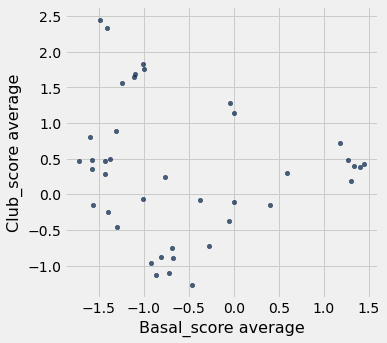

In [31]:
basal_club_association = metadata.select('mouse','cluster','Basal_score','Club_score').group(make_array('mouse','cluster'),np.average).scatter("Basal_score average","Club_score average")
basal_club_association

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.** Create a scatter plot of `Y` (as the y axis) vs `X` (as the x axis) for every cell. Color the scatter plot by the `cluster` of the cells. The `tsne` table should be helpful. **(4 Points)**

*Hint: Remember the group argument of tbl.scatter!*

<!--
BEGIN QUESTION
name: q3_3
manual: true
-->

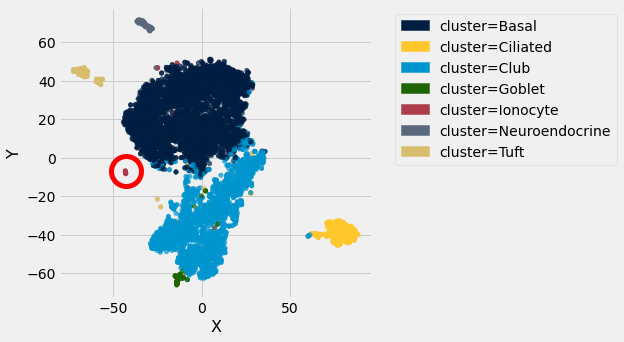

In [32]:
metadata_with_tsne = metadata.join("NAME",tsne)
metadata_with_tsne.scatter("X","Y",group = "cluster")
# DON'T CHANGE THIS LINE
plots.plot(-43, -7, marker='o', markerfacecolor='None', 
         markeredgecolor='r', markersize=30, markeredgewidth=5, linestyle='none');

<!-- END QUESTION -->



#### We marked a specific area of your scatter plot with a large red circle. These few cells (less than 30) were identified as a rare cell type called "Pulmonary Ionocytes".

Recall that the gene Cftr has been associated with cystic fibrosis. The table `dense_matrix`, that you created in part 2, contains expression of 8 genes of interest including Cftr. We call these genes "marker genes". 

In [33]:
dense_matrix

Cell,Ascl3,Asgr1,Atp6v0d2,Atp6v1c2,Cftr,Foxi1,Moxd1,P2ry14,Stap1
Foxj1GFP_M1_AAAGATCTTGCATG,0,0,0,1.63,0,0,0,0,0
Foxj1GFP_M1_AACCGATGAGATCC,0,0,0,1.17,0,0,0,0,0
Foxj1GFP_M1_AACGGTACAACTGC,0,0,0,1.52,0,0,0,0,0
Foxj1GFP_M1_AATAGGGATTCGTT,0,0,0,2.17,0,0,0,0,0
Foxj1GFP_M1_AATCAAACGGCATT,0,0,0,2.46,0,0,0,0,0
Foxj1GFP_M1_AATCCGGAGGTCAT,0,0,0,1.56,0,0,0,0,0
Foxj1GFP_M1_AATCCTACGGTGAG,0,0,0,2.72,0,0,0,0,0
Foxj1GFP_M1_AATCTCTGAACAGA,0,0,0,2.47,0,0,0,0,0
Foxj1GFP_M1_AATGGCTGAGTGTC,0,0,0,1.26,0,0,0,0,0
Foxj1GFP_M1_AATGTCCTAGCACT,0,0,0,1.5,0,0,0,0,0


**Question 4.** Create a table called `proportions` with two columns. The first column should be called `cluster` and have one row for each unique value in the `cluster` column of `metadata`. The second column should be called `Proportion Cftr > 0` and should correspond to the proportion of cells of that cluster type that have a Cftr expression value above 0. **(7 Points)**

*Hint: Read the comments in the code cell! It might be easier to read the second grouping of comments first.*

<!--
BEGIN QUESTION
name: q3_4
manual: false
points:
 - 0
 - 0
 - 7
-->

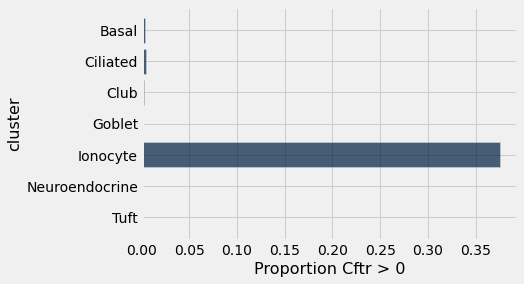

In [34]:
# We need to determine which cells have Cftr greater than 0, 
# and then aggregate that information by cluster!

with_markers = metadata.join('NAME',dense_matrix, 'Cell')

total_count = with_markers.group("cluster").column(1)
boolean_arr = make_array() 
for i in np.arange(with_markers.num_rows):
    above_0_t_or_f = True if with_markers.column("Cftr").item(i)>0 else False
    boolean_arr = np.append(boolean_arr,above_0_t_or_f)
with_cftr_above_0 = with_markers.with_column("Boolean for >0",boolean_arr)

cluster_0_median = with_cftr_above_0.group(make_array('cluster','Boolean for >0')).where("Boolean for >0",are.equal_to(0))
cluster_and_above_0 = cluster_0_median.with_column("counts",total_count-cluster_0_median.column("count"))

# To calculate the proportion of cells above 0, we need the number above 0 and the total number of cells!
# num_true_per_cluster and num_per_cluster should be arrays.
num_true_per_cluster = with_markers.group('cluster').join('cluster', cluster_and_above_0).column("counts")

num_per_cluster = with_markers.group('cluster').join('cluster', cluster_and_above_0).column("count")

# The proportions table needs to have a column called "cluster" for the clusters
# and a column called "Proportion Cftr > 0" with the proportions!
proportions = Table().with_columns(
    "cluster",with_markers.group('cluster').join('cluster', cluster_and_above_0).column(0),
    "Proportion Cftr > 0",num_true_per_cluster/num_per_cluster
)

# Don't change these lines
proportions = proportions.select("cluster", "Proportion Cftr > 0")
proportions.barh("cluster", "Proportion Cftr > 0")

In [35]:
grader.check("q3_4")

q3_4 results: All test cases passed!

### It seems like ionocytes have a much higher expression of the Cftr gene than any other cell type. 

To test this hypothesis, the biologists genetically engineered mice to "turn off" the `Foxi1` gene in some of the mice in the study.

The gene Foxi1 is positively associated with the formation of pulmonary ionocytes. 

**The study found that in the genetically engineered mice, there was an 87.6% reduction in Cftr expression compared to non-genetically engineered ("wild type"/control) mice.**

<!-- BEGIN QUESTION -->

**Question 5.** Based on these results, the results from part 3 question 4, and the results from part 2 question 5, are Pulmonary ionocytes associated with Cftr expression? Is Foxi1 expression associated with Cftr expression? Does Foxi1 expression cause Cftr expression? Why or why not? **(4 Points)**

<!--
BEGIN QUESTION
name: q3_5
manual: true
-->

(1)Yes, the Foxi1 expression is associated with the expression of Cftr. From the bar chart result from q3.4, when Cftr>0, Pulmonary ionocytes have higher expression.
(2)Yes, Foxi1 expression is associated with Cftr expression. From the scatter plot of q2.5, when both genes express, the two genes have a positive association.
(3)No, we don't have enough evidence to prove that Foxi1 expression cause Cftr expression. We need to set up randomized controlled experiment to figure out the causation and avoid confounding factors. Association doesn't means causation. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 6.** Why do you think the scientists studied mice? Do you think the results on mice let us make claims about humans? **(5 Points)**

*Note: As stated at the beginning of the project, you do not need any outside knowledge of biology to answer this question or any other questions. If you have biology knowledge, feel free to use it to answer this question, but it will not impact your score.*

<!--
BEGIN QUESTION
name: q3_6
manual: true
-->

(1) The genes for mice are similiar with human's. Mice are easy to obtain and control. The cost for using mice is lower than that of using other animals. Through studying mice, adequate data needed for both control group and experiment group can be collect to derive and supply a conclusion . 
The other reason is to eusure the safety of human. We don't know the experience result will cause what kind of side effect. It's better to test first on the mice. Once the technology and theory are proved safe and effective, 
it could be possible to develop medicine or therapy with accordance to the derived theory, in a safer way.

(2) No. Though mammals tend to have similar cell structures and genes, there might not be a huge difference between human and mice, we still cannot gurantee 100% on the result of mice being same as human's since there could be unique mechanism in the expression of genes in human bodies. 

<!-- END QUESTION -->



### The genes included in the `dense_matrix` table were chosen because previous research associated them with cystic fibrosis. 

### We want to visualize the expression of these genes in each cell type, in order to conclusively highlight ionocytes as a target for future research and medicine.

You are going to produce a special kind of visualization called a "Dot Plot". First, we need to define a few functions.

**Question 7.** Complete the `proportion_above_0` and `non_zero_mean` functions so they work as described in their docstrings. **(4 Points)**

<!--
BEGIN QUESTION
name: q3_7
manual: false
points:
 - 2
 - 2
-->

In [36]:
def proportion_above_0(arr):
    '''
    Returns the proportion of values in array arr that are above 0.
    
    >>> proportion_above_0(make_array(0, 0, 2, -6, 0.01)) == 0.4
    >>> proportion_above_0(make_array(0, 0, 0)) == 0
    '''
    above_zero = np.count_nonzero(arr>0)
    total = len(arr)
    proportion_ab_zero = above_zero / total
    return proportion_ab_zero

def non_zero_mean(arr):
    '''
    Returns the mean of the nonzero values in array arr. 
    Assume none of the values are negative.
    
    >>> non_zero_mean(make_array(0, 1, 3, 0, 5)) == 3
    >>> non_zero_mean(make_array(0, 0, 0)) == 0
    '''
    numerator = sum(arr)
    denominator = np.count_nonzero(arr)
    
    # DON'T CHANGE THIS CODE
    if denominator == 0:
        return 0
    return numerator / denominator

# Example calls to the functions
proportion_above_0(make_array(0, 0, 2, -6, 0.01)), non_zero_mean(make_array(0, 1, 3, 0, 5))

(0.4, 3.0)

In [37]:
grader.check("q3_7")

q3_7 results: All test cases passed!

**Question 8.** Complete the following cell so that the `values` function performs as specified in its docstring. **(9 Points)**

**NOTE:** 

This is a long question. To finish it, we recommend you first:
- Take a peek at the `values` function. What intermediate tables would make writing this function easier?

Then, define the following tables:
- `markers_with_clusters`
- `clusters_proportion_above_0`
- `clusters_non_zero_avg_expr`

After you are confident about these tables, try completing the values function!

<!--
BEGIN QUESTION
name: q3_8
manual: false
points:
 - 0
 - 2
 - 2
 - 2
 - 3
-->

In [38]:
# We need info about both the expression values and the clusters
markers_with_clusters = metadata.select("NAME","cluster").join('NAME',dense_matrix, 'Cell')
markers_with_clusters.show(2)

# We need info about the proportion of cells with expression above zero, in every gene, for each cluster
clusters_proportion_above_0 = markers_with_clusters.drop("NAME").group("cluster",proportion_above_0)
clusters_proportion_above_0.show(2)

# We need info about the average non zero mean expression, in every gene, for each cluster
clusters_non_zero_avg_expr = markers_with_clusters.drop("NAME").group("cluster", non_zero_mean)
clusters_non_zero_avg_expr.show(2)

def values(cluster, gene):
    '''
    Returns an array of the avg nonzero expression 
    and the proportion nonzero, for a specific cluster and gene.
    '''
    # Get the values for the specific cluster and gene
    # Have the column names changed?
    # You might want to add in extra lines of code here to shorten individual lines.
    non_zero_avg_val = clusters_non_zero_avg_expr.where("cluster",are.equal_to(cluster)).column(gene+" non_zero_mean").item(0)
    proportion_above_0_val = clusters_proportion_above_0.where("cluster",are.equal_to(cluster)).column(gene+" proportion_above_0").item(0)
    # Don't change this line!
    return make_array(non_zero_avg_val, proportion_above_0_val)

# An example call to the function
values("Ionocyte", "Cftr")

NAME,cluster,Ascl3,Asgr1,Atp6v0d2,Atp6v1c2,Cftr,Foxi1,Moxd1,P2ry14,Stap1
Foxj1GFP_M1_AAAGATCTTGCATG,Basal,0,0,0,1.63,0,0,0,0,0
Foxj1GFP_M1_AACCGATGAGATCC,Club,0,0,0,1.17,0,0,0,0,0


cluster,Ascl3 proportion_above_0,Asgr1 proportion_above_0,Atp6v0d2 proportion_above_0,Atp6v1c2 proportion_above_0,Cftr proportion_above_0,Foxi1 proportion_above_0,Moxd1 proportion_above_0,P2ry14 proportion_above_0,Stap1 proportion_above_0
Basal,0.00832033,0.105044,0.000520021,0.927197,0.00312012,0.00156006,0.00208008,0.0270411,0.00312012
Ciliated,0.0176991,0.247788,0.00442478,0.871681,0.00442478,0.00442478,0.00442478,0.00442478,0.00884956


cluster,Ascl3 non_zero_mean,Asgr1 non_zero_mean,Atp6v0d2 non_zero_mean,Atp6v1c2 non_zero_mean,Cftr non_zero_mean,Foxi1 non_zero_mean,Moxd1 non_zero_mean,P2ry14 non_zero_mean,Stap1 non_zero_mean
Basal,2.01437,1.79134,2.4,2.20594,1.595,2.21333,1.8725,1.87865,1.71667
Ciliated,1.5175,1.78161,1.12,1.91437,2.17,2.5,2.22,1.29,1.76


array([2.54777778, 0.375     ])

In [39]:
grader.check("q3_8")

q3_8 results: All test cases passed!

Run the following cell to plot a dot plot of the marker genes. 

- The dot plot has one dot per pair of cluster and marker gene. 

- The size of the dot corresponds to the proportion of cells in that cluster that have expression levels above zero in that gene. 

- The color of the dot corresponds to the average nonzero expression level of cells in that cluster. 

- You don't need to write any code for this question- all the code you wrote is in questions 7 and 8.

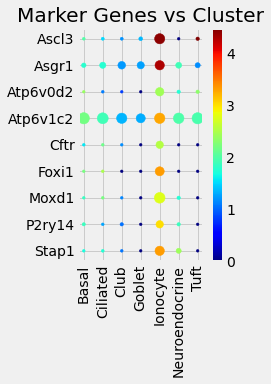

In [40]:
# DON'T CHANGE THIS CODE
# PLOTS THE DOT PLOT
clusters = np.unique(metadata.column("cluster"))
x_axis_ticks = np.arange(0, len(clusters))
genes_uniq = ["Stap1", "P2ry14", "Moxd1", "Foxi1", "Cftr", "Atp6v1c2", "Atp6v0d2", "Asgr1", "Ascl3"]
y_axis_ticks = np.arange(0, len(genes_uniq))
mesh = np.meshgrid(x_axis_ticks, y_axis_ticks)
plots.figure(figsize=(2.5,4))

sizes = np.zeros_like(mesh[0], dtype=float)
colors = np.zeros_like(mesh[0], dtype=float)

for i, c in enumerate(clusters):
    for j, g in enumerate(genes_uniq):
        vals = values(c, g)
        m = vals[0]
        p = vals[1]
        
        sizes[j, i] = p
        colors[j, i] = m


sizes = 7 + (sizes * (120/np.max(sizes)))
plots.scatter(mesh[0], mesh[1], s=sizes, c=colors, cmap="jet");

plots.xticks(x_axis_ticks, clusters, rotation = 90);
plots.yticks(y_axis_ticks, genes_uniq);
plots.colorbar();
plots.title("Marker Genes vs Cluster");

### As you can see, ionocytes are indeed associated with our marker genes, and thus associated with cystic fibrosis. With this knowledge in hand, we can design future experiments to analyze the effects of medicines targeted at this cell type, and work towards treating cystic fibrosis. 

# Congrats, you have finished Project 1!

Using your table manipulation and visualization skills you have:
- Analyzed the popularity of a new technology, scRNA-seq, using rolling averages
- Manipulated scRNA-seq data into a usable format
- Identified an association between a novel cell type, ionocytes, and the disease cystic fibrosis, opening the way for future research.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [41]:
grader.check_all()

q1_1 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q3_4 results: All test cases passed!

q3_7 results: All test cases passed!

q3_8 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [42]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)